<a href="https://colab.research.google.com/github/s1063724/GetCarPrice/blob/main/program/GetCarPriceWithKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
  資料來源:kaggle
    - https://www.kaggle.com/datasets/mrsimple07/car-prices-prediction-data?resource=download
  樣本數:1000筆

  欄位:Make(品牌)、Model(型號)、Year(年分)、Mileage(里程)、Condiction(車況)、Price(價錢)
'''

import pandas as pd
import numpy as np

df = pd.read_csv('CarPricesPrediction.csv', encoding='utf-8', index_col = ['Make'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Ford to Nissan
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      1000 non-null   int64  
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 54.7+ KB


In [ ]:
df.pop('Index')

Make
Ford           0
Toyota         1
Chevrolet      2
Ford           3
Chevrolet      4
            ... 
Nissan       995
Chevrolet    996
Ford         997
Toyota       998
Nissan       999
Name: Index, Length: 1000, dtype: int64

In [ ]:
df

,Model,Year,Mileage,Condition,Price
Make,,,,,
Ford,Silverado,2022,18107,Excellent,19094.75
Toyota,Silverado,2014,13578,Excellent,27321.10
Chevrolet,Civic,2016,46054,Good,23697.30
Ford,Civic,2022,34981,Excellent,18251.05
Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...
Nissan,Camry,2010,149032,Excellent,24548.50
Chevrolet,F-150,2014,20608,Excellent,26969.70
Ford,Altima,2016,109851,Good,20507.55


In [ ]:
df.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


In [ ]:
data = df.copy()

In [ ]:
target = data.pop('Price')

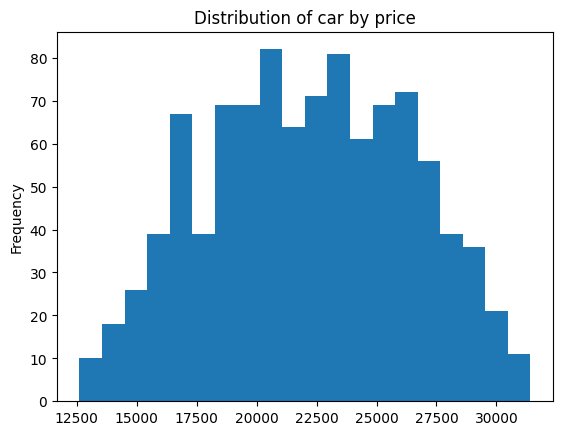

In [ ]:
df['Price'].plot.hist(bins=20)
plt.title("Distribution of car by price")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


data['Condition'] = le.fit_transform(data['Condition'])

data['Model'] = le.fit_transform(data['Model'])
data

,Model,Year,Mileage,Condition
Make,,,,
Ford,4,2022,18107,0
Toyota,4,2014,13578,0
Chevrolet,2,2016,46054,2
Ford,2,2022,34981,0
Chevrolet,2,2019,63565,0
...,...,...,...,...
Nissan,1,2010,149032,0
Chevrolet,3,2014,20608,0
Ford,0,2016,109851,2


In [ ]:
# 計算種類
print(data.Model.nunique())
print(data.Condition.nunique())

5
3


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_valid, target_train, target_valid = train_test_split(data, target, test_size=0.2)
print(data_train.shape)
print(data_valid.shape)

print(target_train.shape)
print(target_valid.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(data_train, target_train)

pre = regr.predict(data_valid)
# 預測結果(汽車價格)
print(pre.round(2))
# 實際結果(汽車價格)
print(target_valid)

[25331.85 15660.4  19017.81 20335.05 26463.35 23751.15 28067.7  18754.15
 15313.8  15447.55 24763.   27587.8  23668.95 21811.36 19113.   21876.36
 23697.35 22756.06 21447.46 17121.35 22115.06 25506.7  16080.   25322.05
 26576.05 26644.05 19836.5  25434.8  26925.5  26434.34 21254.15 23915.7
 19869.   21156.6  26341.8  24305.8  26189.55 17665.1  16575.85 25097.25
 16389.91 19607.6  18875.25 27160.95 23856.05 24388.09 17698.2  13702.8
 29955.6  27977.95 30460.75 24376.59 20419.21 18119.25 16401.75 23398.95
 27504.6  20855.6  22532.2  24330.54 20199.15 21659.1  13017.5  22499.35
 20669.35 30366.85 16149.05 21010.6  22992.95 27583.5  21827.45 22526.5
 27972.65 27752.8  18813.75 19901.4  26305.15 20251.25 29594.65 19385.4
 13729.8  18313.3  28016.2  28653.05 15218.45 23201.01 18703.66 16966.8
 20323.06 25762.95 19653.16 25106.45 19663.81 25383.45 25791.45 26525.5
 18587.   16125.6  28286.75 24260.9  17986.45 22957.4  20710.7  19255.51
 26089.65 18064.81 23028.7  17756.15 23568.81 19201.1  16

<ipython-input-63-6db7d9221aaf>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=target_valid, y=pre , palette='magma')


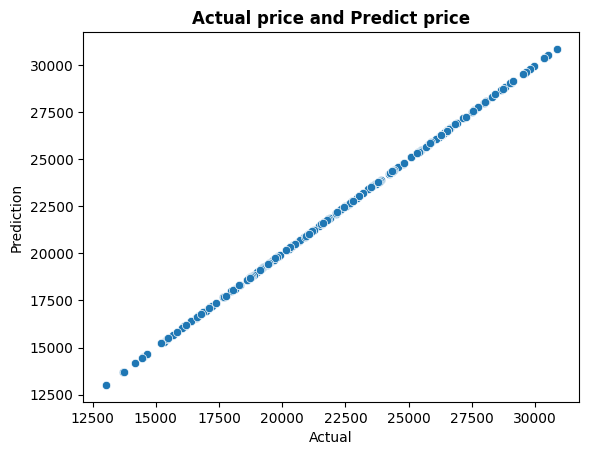

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=target_valid, y=pre , palette='magma')
plt.title('Actual price and Predict price', fontweight='bold')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [ ]:
# 訓練分數
print(regr.score(data_train, target_train).round(3))
# 驗證分數
print(regr.score(data_valid, target_valid).round(3))

1.0
1.0


In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
# 測試資料答案跟預測結果
print(mean_absolute_error(target_valid, pre).round(2))

0.06


In [ ]:
'''
  簡單線性回歸
    用年分預測價錢

'''

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = pd.DataFrame(df, columns=['Year'])
y = pd.DataFrame(df, columns=['Price'])

lm = LinearRegression()
lm.fit(X,y)
print('迴歸係數',lm.coef_)
print('截距',lm.intercept_)

# y = -991.12X +2020169.19

迴歸係數 [[-991.12489613]]
截距 [2020169.19438224]


In [ ]:
# 預測
new_y = pd.DataFrame(np.array([2021, 2001 ,2012]),columns = ['Year'])
pred_p = lm.predict(new_y)
print('AI 的答案:\n',pred_p)

AI 的答案:
 [[17105.77930838]
 [36928.27723094]
 [26025.90337353]]


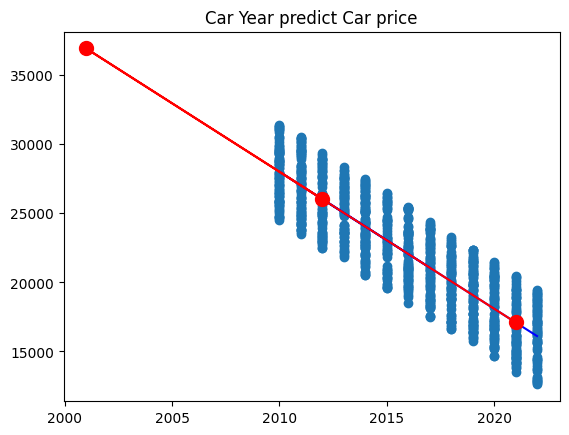

In [ ]:
plt.scatter(df['Year'], df['Price'])
re_price = lm.predict(X)
plt.plot(df['Year'], re_price, color = 'b')
plt.plot(new_y, pred_p, color = 'r', marker = 'o', markersize = 10)
plt.title('Car Year predict Car price')
plt.show()